In [6]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

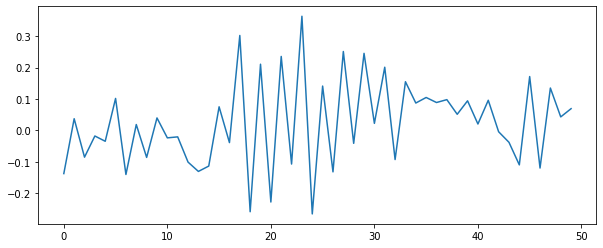

In [19]:
true_phi_1 = -0.2
true_phi_2 = 0.5
true_sigma = 0.1

xvals = [np.random.normal(0, true_sigma), np.random.normal(0, true_sigma)]
for _ in range(50):
    xvals.append(true_phi_1*xvals[-1] + true_phi_2*xvals[-2] + np.random.normal(0, true_sigma))
xvals = np.array(xvals[2:])
plt.figure(figsize=(10,4))
plt.plot(xvals)
plt.show()


In [29]:
model = ARIMA(xvals, order=(2,0,0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                 ARIMA(2, 0, 0)   Log Likelihood                  47.073
Date:                Sat, 25 Jun 2022   AIC                            -86.146
Time:                        21:27:24   BIC                            -78.498
Sample:                             0   HQIC                           -83.234
                                 - 50                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0219      0.020      1.096      0.273      -0.017       0.061
ar.L1         -0.2373      0.106     -2.233      0.026      -0.446      -0.029
ar.L2          0.5716      0.126      4.535      0.000       0.325       0.819
sigma2         0.0087      0.002      4.320      0.000       0.005       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                 0.67
Prob(Q):                              0.52   Prob(JB):                         0.72
Heteroskedasticity (H):               0.92   Skew:                             0.22
Prob(H) (two-sided):                  0.86   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
true_phi_1 = 0.4
true_phi_2 = -0.22
true_phi_3 = 0.7379
true_ma1 = -0.9507
true_sigma = .1019

xvals = [np.random.normal(0, true_sigma), 
         np.random.normal(0, true_sigma),
         np.random.normal(0, true_sigma)]



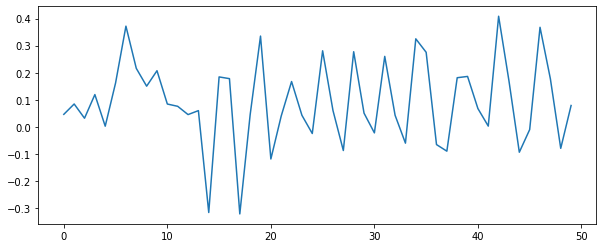

In [44]:
for _ in range(50):
    xvals.append(true_phi_1*xvals[-1] +
                 true_phi_2*xvals[-2] + 
                 true_phi_3*xvals[-3]+
                 true_ma1*np.random.normal(0, true_sigma)+
                 np.random.normal(0, true_sigma))
xvals = np.array(xvals[3:])
plt.figure(figsize=(10,4))
plt.plot(xvals)
plt.show()

In [45]:
model = ARIMA(xvals, order=(3,0,1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                 ARIMA(3, 0, 1)   Log Likelihood                  33.680
Date:                Sat, 25 Jun 2022   AIC                            -55.360
Time:                        21:29:39   BIC                            -43.888
Sample:                             0   HQIC                           -50.991
                                 - 50                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0919      0.020      4.641      0.000       0.053       0.131
ar.L1          0.1504      0.482      0.312      0.755      -0.795       1.096
ar.L2         -0.4205      0.177     -2.375      0.018      -0.767      -0.074
ar.L3          0.4463      0.240      1.861      0.063      -0.024       0.916
ma.L1         -0.1106      0.500     -0.221      0.825      -1.091       0.870
sigma2         0.0149      0.002      5.974      0.000       0.010       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.16
Prob(Q):                              0.98   Prob(JB):                         0.05
Heteroskedasticity (H):               0.70   Skew:                            -0.50
Prob(H) (two-sided):                  0.47   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

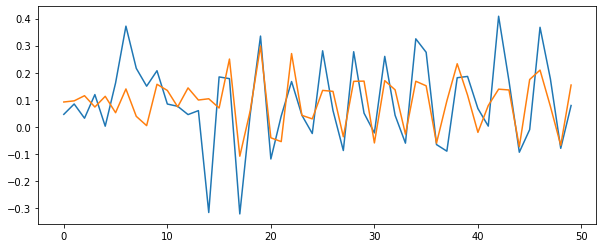

In [46]:
plt.figure(figsize=(10,4))
plt.plot(xvals)
plt.plot(model.fittedvalues)

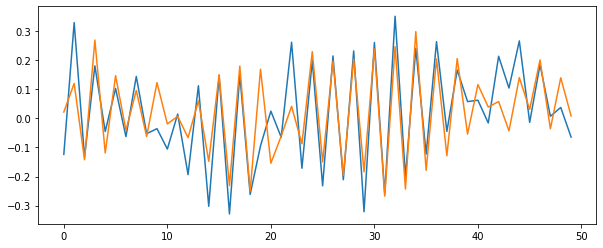

In [9]:
plt.figure(figsize=(10,4))
plt.plot(xvals)
plt.plot(model.fittedvalues)

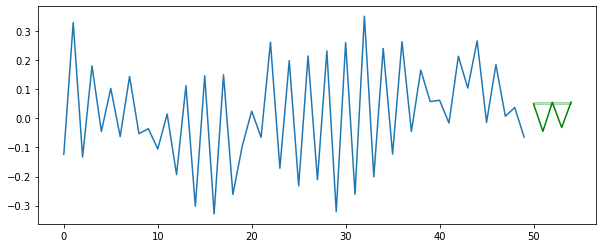

In [12]:
plt.figure(figsize=(10,4))
plt.plot(xvals)
forecast = model.forecast(5)
plt.plot(range(len(xvals), len(xvals) + 5), forecast[0:], color = 'g')
plt.fill_between(range(len(xvals), len(xvals) + 5), forecast[0], forecast[4], color='g', alpha=0.25)

C:\Users\zaneh\AppData\Local\Programs\Python\Python310\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\zaneh\AppData\Local\Programs\Python\Python310\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\zaneh\AppData\Local\Programs\Python\Python310\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\zaneh\AppData\Local\Programs\Python\Python310\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  va

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 95 seconds.
C:\Users\zaneh\AppData\Local\Temp\ipykernel_63016\911109068.py:13: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\zaneh\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


<Figure size 504x504 with 0 Axes>

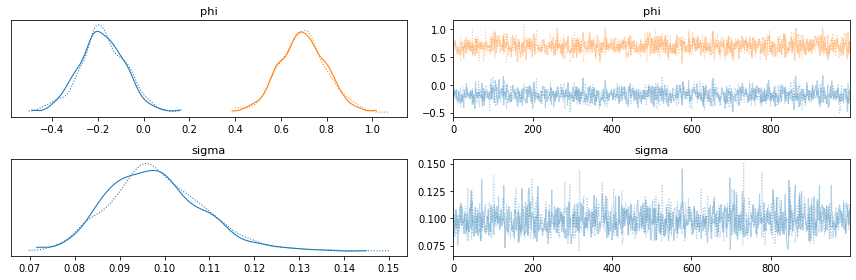

In [13]:
with pm.Model() as bayes_model:
    #priors
    phi = pm.Normal("phi", mu=0, sigma=20, shape=2)
    sigma = pm.Exponential("sigma", lam=1)

    #Likelihood
    likelihood = pm.AR("x", phi, sigma, observed=xvals)

    #posterior
    trace = pm.sample(1000)
    
plt.figure(figsize=(7, 7))
pm.traceplot(trace)
plt.tight_layout()

C:\Users\zaneh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


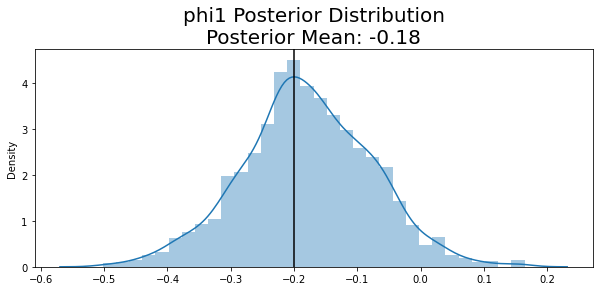

C:\Users\zaneh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


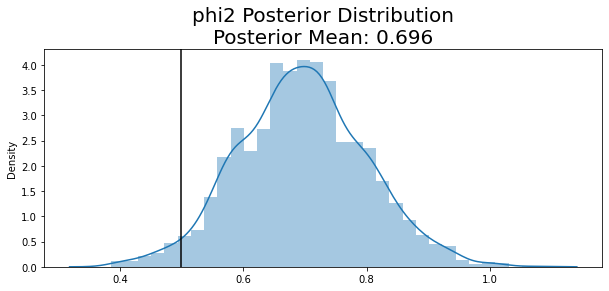

C:\Users\zaneh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


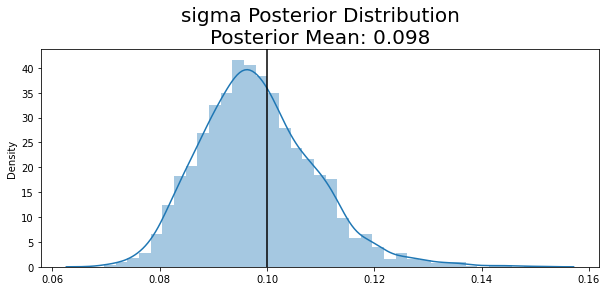

In [14]:
phi1_vals = trace.get_values('phi')[:,0]
phi2_vals = trace.get_values('phi')[:,1]
sigma_vals = trace.get_values('sigma')

plt.figure(figsize=(10,4))
sns.distplot(phi1_vals)
plt.axvline(true_phi_1, color='k')
plt.title('phi1 Posterior Distribution\nPosterior Mean: %s'%round(phi1_vals.mean(), 3), fontsize=20)
plt.show()

plt.figure(figsize=(10,4))
sns.distplot(phi2_vals)
plt.axvline(true_phi_2, color='k')
plt.title('phi2 Posterior Distribution\nPosterior Mean: %s'%round(phi2_vals.mean(), 3), fontsize=20)
plt.show()

plt.figure(figsize=(10,4))
sns.distplot(sigma_vals)
plt.axvline(true_sigma, color='k')
plt.title('sigma Posterior Distribution\nPosterior Mean: %s'%round(sigma_vals.mean(), 3), fontsize=20)
plt.show()

In [15]:
num_samples = 10000
forecasted_vals = []
num_periods = 5

for _ in range(num_samples):
    curr_vals = list(xvals.copy())
    
    phi1_val = np.random.choice(phi1_vals)
    phi2_val = np.random.choice(phi2_vals)
    sigma_val = np.random.choice(sigma_vals)
    
    for _ in range(num_periods):
        curr_vals.append(curr_vals[-1]*phi1_val + curr_vals[-2]*phi2_val + np.random.normal(0, sigma_val))
    forecasted_vals.append(curr_vals[-num_periods:]) 
forecasted_vals = np.array(forecasted_vals)

C:\Users\zaneh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zaneh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zaneh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

IndexError: index 4 is out of bounds for axis 0 with size 4

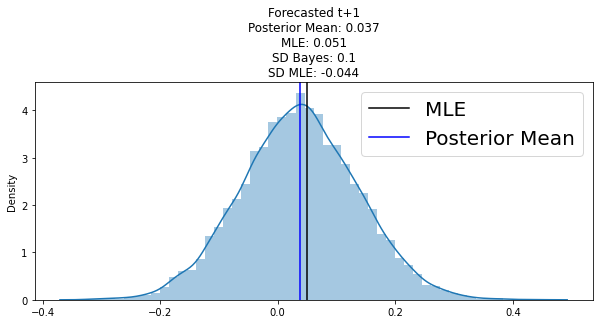

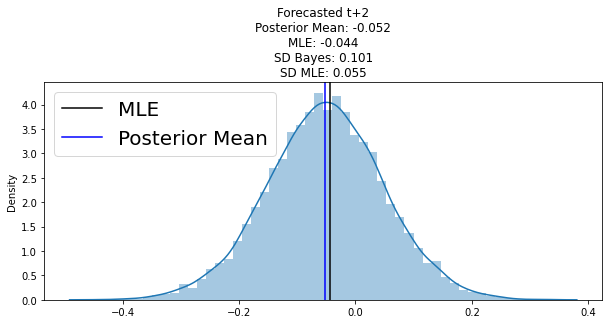

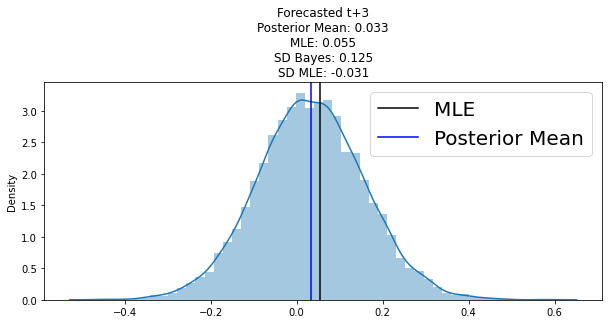

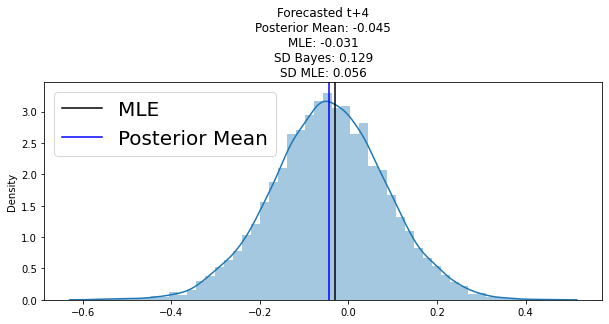

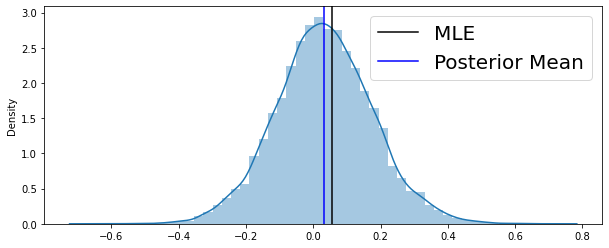

In [18]:
for i in range(num_periods):
    plt.figure(figsize=(10,4))
    vals = forecasted_vals[:,i]
    mu, dev = round(vals.mean(), 3), round(vals.std(), 3)
    sns.distplot(vals)
    p1 = plt.axvline(forecast[0:][i], color='k')
    p2 = plt.axvline(vals.mean(), color='b')
    plt.legend((p1,p2), ('MLE', 'Posterior Mean'), fontsize=20)
    plt.title('Forecasted t+%s\nPosterior Mean: %s\nMLE: %s\nSD Bayes: %s\nSD MLE: %s'%((i+1), 
                                                                                        mu,
                                                                                        round(forecast[0:][i],3),
                                                                                        dev,
                                                                                        round(forecast[1:][i],3)))